In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Figure 6b

In [2]:
import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.data_wrangling as data 

## JRA55
# import dataset for maths servers
ds = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc')
ds 

<xarray.Dataset>
Dimensions:   (time: 708, pressure: 22, latitude: 73)
Coordinates:
  * time      (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T09:00:00
  * pressure  (pressure) float32 1e+03 925.0 850.0 700.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
Data variables:
    ubar      (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    div1_pr   (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    div1_qg   (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>

In [5]:
r = ef.calculate_efp_latitude(ds, check_variables=True, level_mean=False)

In [22]:
r[1]

<xarray.DataArray (lat: 37)>
array([0.04695579, 0.08639587, 0.012331  , 0.06047799, 0.17563771,
       0.20047699, 0.17102312, 0.11304993, 0.01311325, 0.19630986,
       0.39641408, 0.51039122, 0.35786272, 0.38434607, 0.38269417,
       0.28216218, 0.45788769, 0.59836131, 0.63002309, 0.6953473 ,
       0.69181112, 0.62456492, 0.46822089, 0.4467244 , 0.56549636,
       0.52334982, 0.40808129, 0.31545448, 0.22272352, 0.08629965,
       0.02118688, 0.00561804, 0.00070582, 0.01277219, 0.04301177,
              nan,        nan])
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 0.0 2.5 5.0 7.5 10.0 ... 80.0 82.5 85.0 87.5 90.0

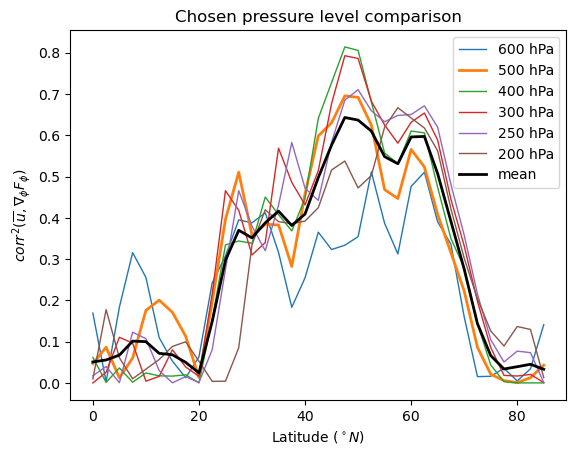

In [42]:
plt.figure()

for i in range(len(r.level)):
    lw=1.
    if i == 1: lw=2.

    plt.plot(r.lat.values, r[i,:].values, linewidth=lw, label=f'{r.level[i].values.astype(np.int64)} hPa')
    
plt.plot(r.lat.values, r.mean('level').values, color='k', linewidth=2, label='mean')

plt.xlabel('Latitude ($^\\circ N$)')
plt.ylabel('$corr^2(\\overline{u}, \\nabla_{\\phi} F_{\\phi})$')
plt.title('Chosen pressure level comparison')
plt.legend()

plt.show() 